## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file



## Import Statements

In [63]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df=pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])
df.head()
#df.tail()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [65]:
df.tail()

,DATE,TAG,POSTS
2463,2023-05-01 00:00:00,php,2077
2464,2023-05-01 00:00:00,python,12196
2465,2023-05-01 00:00:00,r,2900
2466,2023-05-01 00:00:00,ruby,258
2467,2023-05-01 00:00:00,swift,1032


In [66]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [67]:
df.shape

(2468, 3)

In [68]:
df ['DATE'].count()

2468

In [69]:
df.count()

DATE     2468
TAG      2468
POSTS    2468
dtype: int64

**Challenge**: Count the number of entries in each column of the dataframe

In [91]:
df_per_lang= df.groupby('TAG',as_index = False).sum()
print(df_per_lang)


           TAG                                               DATE    POSTS
0     assembly  2008-08-01 00:00:002008-09-01 00:00:002008-10-...    42772
1            c  2008-08-01 00:00:002008-09-01 00:00:002008-10-...   396385
2           c#  2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1591249
3          c++  2008-08-01 00:00:002008-09-01 00:00:002008-10-...   793650
4       delphi  2008-08-01 00:00:002008-09-01 00:00:002008-10-...    50906
5           go  2009-11-01 00:00:002009-12-01 00:00:002010-01-...    69122
6         java  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1895798
7   javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2492822
8         perl  2008-08-01 00:00:002008-09-01 00:00:002008-10-...    67643
9          php  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1457480
10      python  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2133660
11           r  2008-09-01 00:00:002008-11-01 00:00:002008-12-...   489953
12        ruby  2008-08-0

In [92]:
df_per_lang.columns

Index(['TAG', 'DATE', 'POSTS'], dtype='object')

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [93]:
df_per_lang=df_per_lang.sort_values(by=['POSTS'])

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [94]:
import pandas as pd
import numpy as np
import datetime

# Convert the 'DATE' column to pandas DateTime format
df_per_lang['DATE'] = pd.to_datetime(df_per_lang['DATE']).dt.date

# Get the current date as date 
current_date = pd.to_datetime('today').date()
print(type(current_date))

# Calculate the difference in months
df_per_lang['months_diff'] = (current_date - df_per_lang['DATE'])/ np.timedelta64(1,'M')
df_per_lang['months_diff']=df_per_lang['months_diff'].round(0) # .apply(np.ceil) or .apply(np.floor)

# Print the resulting DataFrame
print(df_per_lang)

<class 'datetime.date'>
           TAG        DATE    POSTS  months_diff
0     assembly  2008-08-01    42772        176.0
4       delphi  2008-08-01    50906        176.0
8         perl  2008-08-01    67643        176.0
5           go  2009-11-01    69122        161.0
12        ruby  2008-08-01   227866        176.0
13       swift  2009-01-01   327061        171.0
1            c  2008-08-01   396385        176.0
11           r  2008-09-01   489953        175.0
3          c++  2008-08-01   793650        176.0
9          php  2008-08-01  1457480        176.0
2           c#  2008-07-01  1591249        177.0
6         java  2008-08-01  1895798        176.0
10      python  2008-08-01  2133660        176.0
7   javascript  2008-08-01  2492822        176.0


/tmp/ipykernel_36185/167712973.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_per_lang['DATE'] = pd.to_datetime(df_per_lang['DATE']).dt.date


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [95]:
df_per_lang.shape

(14, 4)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [96]:
df_per_lang.columns


Index(['TAG', 'DATE', 'POSTS', 'months_diff'], dtype='object')

In [123]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [124]:
reshaped_df.shape

(179, 14)

In [120]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [121]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,1591249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,42772.0,396385.0,NaN,793650.0,50906.0,NaN,1895798.0,2492822.0,67643.0,1457480.0,2133660.0,NaN,227866.0,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489953.0,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327061.0
2009-11-01,NaN,NaN,NaN,NaN,NaN,69122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
reshaped_df = reshaped_df.fillna(0) 

In [125]:
reshaped_df.count() 

TAG
assembly      178
c             178
c#            179
c++           178
delphi        178
go            163
java          178
javascript    178
perl          178
php           178
python        178
r             176
ruby          178
swift         170
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<BarContainer object of 14 artists>

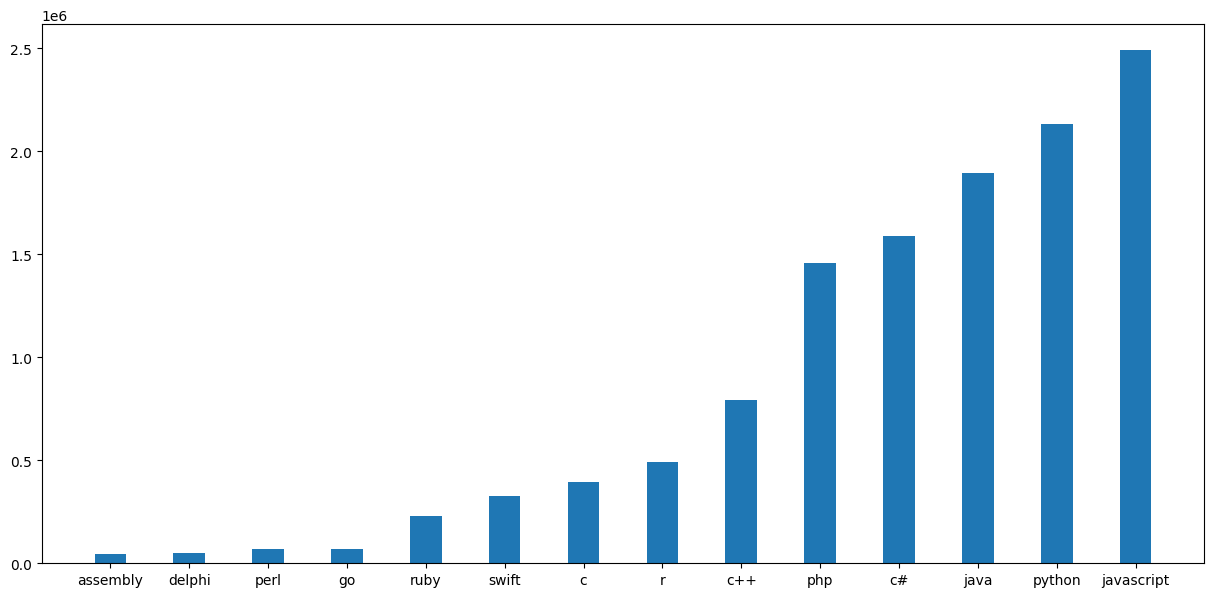

In [109]:
import matplotlib.pyplot as plt

# Figure Size
fig = plt.figure(figsize =(15, 7))

plt.bar( "TAG", "POSTS", data=df_per_lang, width=0.4)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

       TAG        DATE    POSTS  months_diff
6     java  2008-08-01  1895798        176.0
10  python  2008-08-01  2133660        176.0


<BarContainer object of 2 artists>

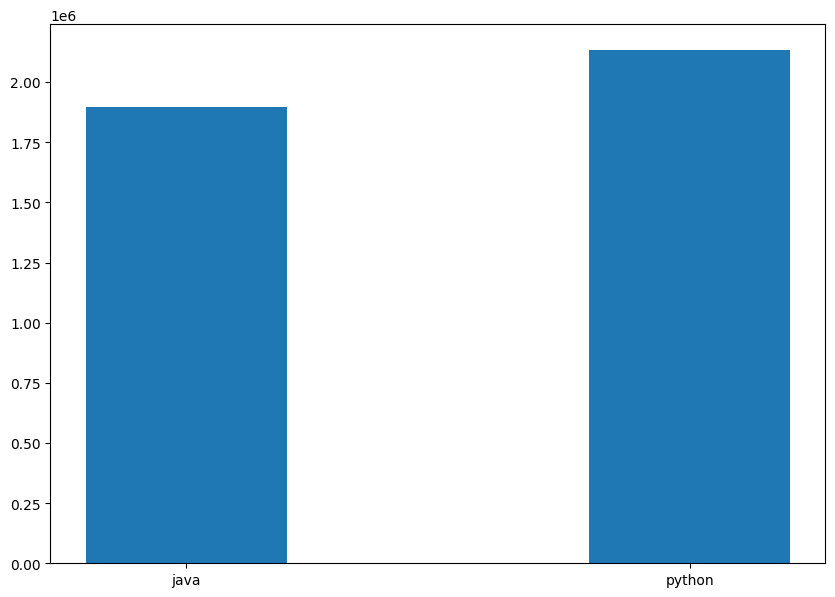

In [117]:
# EXTRACT only the row of java
#x=df_per_lang.loc[(df_per_lang['TAG']=='java')] 

# EXTRACT only the row two rows with index
df_jp=df_per_lang.loc[[6,10],:] 
print(df_jp)

# Figure Size
fig = plt.figure(figsize =(10, 7))


plt.bar( "TAG", "POSTS", data=df_jp, width=0.4)

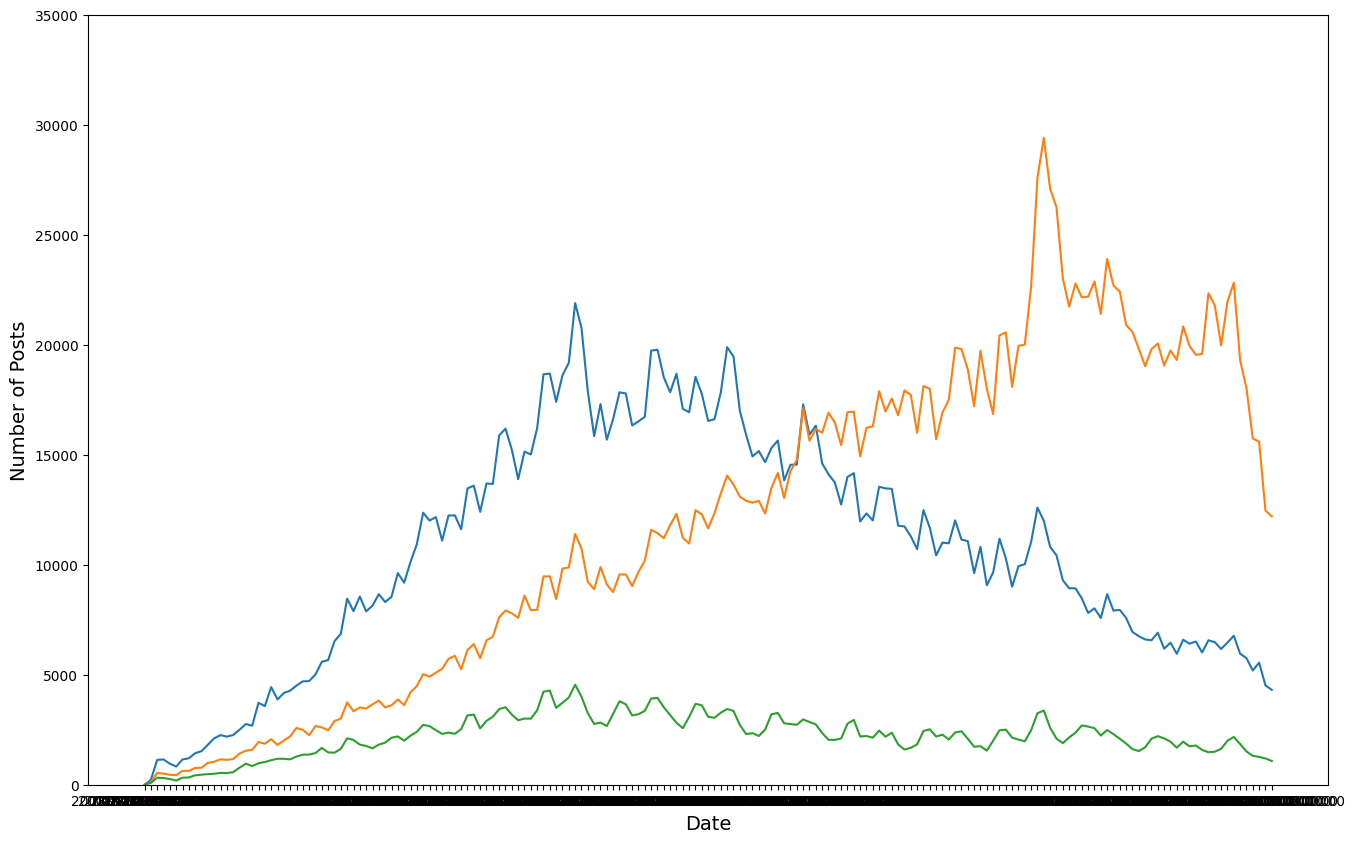

In [137]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.c)




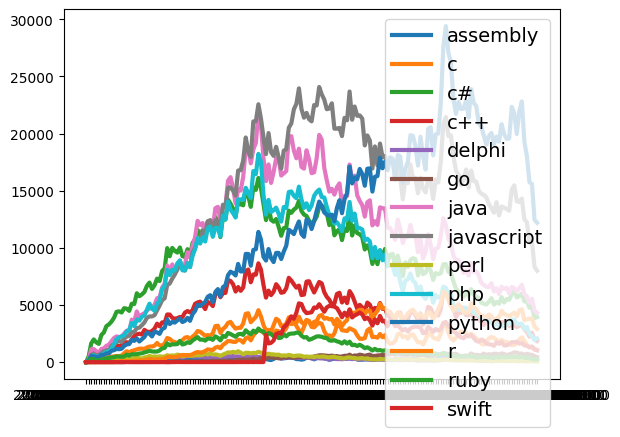

In [141]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=14)